# 1. Import Libraries 

In [1]:
import os
import glob
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import altair as alt

#from skimage import img_as_ubyte, io, color
#import cv2

import collections
from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 2. Data processing 

# 2.1 Load Image Features

### 2.1.1 Import pre-extracted 2048-dim top layer pooling features

In [2]:
type = 'Original'

if type == 'Original':
    Resnet101_features_df = pd.read_csv("C:/Dissertation/Data/AwA2-features/Animals_with_Attributes2/Features/ResNet101/AwA2-features.txt", sep = " ",header = None)
elif type == 'User extracted':
    Resnet101_features_df = pd.read_csv("C:/Dissertation/Data/Processed Data/Extracted_ResNet101_features.csv")
    Resnet101_features_df.drop(['Unnamed: 0','filenames','classes'],1,inplace = True)
    
Resnet101_features_df.head()

0         1         2         3         4         5         6     \
0  0.127028  3.236108  0.935148  0.144205  1.114897  1.502288  0.410044   
1  0.000000  2.466911  0.026454  0.075211  1.159094  3.066645  0.191157   
2  0.383341  1.011904  0.000000  0.054472  0.343532  0.917366  0.044860   
3  0.117190  1.225786  0.001932  0.000000  3.135732  0.061605  0.974178   
4  0.274902  0.337544  0.084937  0.000000  1.788061  0.143165  0.250313   

       7         8         9         10        11        12        13    \
0  0.053410  0.000000  0.350173  0.054348  1.024090  0.020143  0.353289   
1  0.049365  0.017394  0.000000  0.331170  0.729361  0.000000  0.422115   
2  0.100728  0.266673  0.079659  0.081936  1.069659  0.144164  0.109519   
3  0.463193  0.057579  0.007712  0.171944  0.295372  0.017943  0.792748   
4  0.000000  0.134671  0.149908  0.036444  0.548512  0.000000  0.000000   

       14        15        16        17        18        19        20    \
0  0.011384  0.720656  0.217305  0.072973  0.445864  0.042429  0.106986   
1  0.102513  0.139059  0.056042  0.025745  0.952244  0.000000  0.261578   
2  0.002651  2.085719  0.000000  0.025379  0.966556  0.000000  0.157979   
3  0.088362  1.248844  0.086086  0.000000  2.634768  0.019520  0.054810   
4  0.018893  1.289334  0.011617  0.000000  0.829093  0.000839  0.155291   

       21        22        23        24        25        26        27    \
0  0.064491  0.220563  0.186625  0.064375  0.905771  0.000000  0.049701   
1  0.031689  0.513310  0.075797  0.030957  0.885500  0.108216  0.173602   
2  0.003235  0.035769  0.087319  0.014195  0.588280  0.041875  0.126623   
3  1.063130  0.065707  0.087572  0.000000  0.247732  0.451039  0.028920   
4  0.032264  0.266333  0.156895  0.110835  0.650663  0.565998  0.183328   

       28        29        30        31        32        33        34    \
0  0.000000  0.318226  0.000000  0.000000  0.049137  0.428464  1.127403   
1  0.001634  0.086215  0.015478  0.052174  0.000000  0.025580  1.295454   
2  0.061013  0.348197  0.000000  0.000000  0.000000  0.038685  1.132497   
3  0.018679  1.479101  0.000000  0.000000  0.263992  0.194019  1.657052   
4  0.000000  0.276672  0.000000  0.256715  0.000000  0.000000  1.187277   

       35        36        37        38        39        40        41    \
0  0.102526  0.000000  0.038003  0.106223  0.311152  0.000000  0.019999   
1  0.163991  0.173771  0.069671  0.149641  0.197108  0.018292  0.000000   
2  0.217534  0.179595  0.000000  0.073511  0.000000  0.000000  0.002415   
3  0.016796  0.098296  0.000000  0.004977  0.741545  0.086623  0.000000   
4  0.028559  0.221683  0.003226  1.132679  0.042693  0.000000  0.049115   

       42        43        44        45        46        47        48    \
0  0.000551  0.908781  0.203857  0.014165  0.286482  0.007810  0.129519   
1  0.285535  0.044062  0.351619  0.000000  0.752595  0.024019  1.222585   
2  0.029289  0.055964  0.000000  0.000000  0.072734  0.110327  2.215182   
3  0.063416  0.003287  0.215739  0.079673  0.001234  0.001132  0.583685   
4  0.001570  0.000000  0.183444  0.002719  0.576444  0.000000  0.011798   

       49        50        51        52        53        54        55    \
0  2.859849  0.009950  0.087389  0.457276  0.021981  0.000000  0.040496   
1  0.170200  0.311633  0.169107  0.880644  0.125989  0.107684  0.290507   
2  0.401380  0.655192  0.000000  0.211098  0.733769  0.048249  0.055743   
3  1.865241  0.175291  0.000000  0.845650  0.294949  0.700022  0.028870   
4  0.141580  0.203759  0.000000  0.166505  0.048664  0.085495  0.190443   

       56        57        58        59        60        61        62    \
0  0.000000  0.343235  0.375391  0.000000  0.056302  0.123942  0.000000   
1  0.017988  0.005128  0.943824  1.358685  0.055318  0.451732  0.049051   
2  0.014849  0.039346  0.000000  0.045026  0.000000  0.169894  0.122326   
3  0.021226  0.359319  2.249892  0.190143  0.000000  0.059208  0.000000   
4  0.000000  0.000981  0

### 2.1.2 Import filenames, labels and class names

In [3]:
#Image names
Resnet101_filenames_df = pd.read_csv("C:/Dissertation/Data/AwA2-features/Animals_with_Attributes2/Features/ResNet101/AwA2-filenames.txt", sep = " ",header = None, names = ['filenames'])
Resnet101_filenames_df.head()

filenames
0  antelope_10001.jpg
1  antelope_10002.jpg
2  antelope_10003.jpg
3  antelope_10004.jpg
4  antelope_10005.jpg

In [4]:
Resnet101_labels_df = pd.read_csv("C:/Dissertation/Data/AwA2-features/Animals_with_Attributes2/Features/ResNet101/AwA2-labels.txt", sep = " ",header = None, names = ['labels'] )
Resnet101_labels_df.head()

labels
0       1
1       1
2       1
3       1
4       1

In [5]:
classes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/classes.txt", sep = '\t',header = None, names = ['labels','classes'])
classes_df.head()

labels       classes
0       1      antelope
1       2  grizzly+bear
2       3  killer+whale
3       4        beaver
4       5     dalmatian

### 2.1.3 Concat features, filenames & labels

In [6]:
Imagedata_df = pd.concat([Resnet101_filenames_df, Resnet101_features_df, Resnet101_labels_df], axis=1)
Imagedata_df.head()

filenames         0         1         2         3         4  \
0  antelope_10001.jpg  0.127028  3.236108  0.935148  0.144205  1.114897   
1  antelope_10002.jpg  0.000000  2.466911  0.026454  0.075211  1.159094   
2  antelope_10003.jpg  0.383341  1.011904  0.000000  0.054472  0.343532   
3  antelope_10004.jpg  0.117190  1.225786  0.001932  0.000000  3.135732   
4  antelope_10005.jpg  0.274902  0.337544  0.084937  0.000000  1.788061   

          5         6         7         8         9        10        11  \
0  1.502288  0.410044  0.053410  0.000000  0.350173  0.054348  1.024090   
1  3.066645  0.191157  0.049365  0.017394  0.000000  0.331170  0.729361   
2  0.917366  0.044860  0.100728  0.266673  0.079659  0.081936  1.069659   
3  0.061605  0.974178  0.463193  0.057579  0.007712  0.171944  0.295372   
4  0.143165  0.250313  0.000000  0.134671  0.149908  0.036444  0.548512   

         12        13        14        15        16        17        18  \
0  0.020143  0.353289  0.011384  0.720656  0.217305  0.072973  0.445864   
1  0.000000  0.422115  0.102513  0.139059  0.056042  0.025745  0.952244   
2  0.144164  0.109519  0.002651  2.085719  0.000000  0.025379  0.966556   
3  0.017943  0.792748  0.088362  1.248844  0.086086  0.000000  2.634768   
4  0.000000  0.000000  0.018893  1.289334  0.011617  0.000000  0.829093   

         19        20        21        22        23        24        25  \
0  0.042429  0.106986  0.064491  0.220563  0.186625  0.064375  0.905771   
1  0.000000  0.261578  0.031689  0.513310  0.075797  0.030957  0.885500   
2  0.000000  0.157979  0.003235  0.035769  0.087319  0.014195  0.588280   
3  0.019520  0.054810  1.063130  0.065707  0.087572  0.000000  0.247732   
4  0.000839  0.155291  0.032264  0.266333  0.156895  0.110835  0.650663   

         26        27        28        29        30        31        32  \
0  0.000000  0.049701  0.000000  0.318226  0.000000  0.000000  0.049137   
1  0.108216  0.173602  0.001634  0.086215  0.015478  0.052174  0.000000   
2  0.041875  0.126623  0.061013  0.348197  0.000000  0.000000  0.000000   
3  0.451039  0.028920  0.018679  1.479101  0.000000  0.000000  0.263992   
4  0.565998  0.183328  0.000000  0.276672  0.000000  0.256715  0.000000   

         33        34        35        36        37        38        39  \
0  0.428464  1.127403  0.102526  0.000000  0.038003  0.106223  0.311152   
1  0.025580  1.295454  0.163991  0.173771  0.069671  0.149641  0.197108   
2  0.038685  1.132497  0.217534  0.179595  0.000000  0.073511  0.000000   
3  0.194019  1.657052  0.016796  0.098296  0.000000  0.004977  0.741545   
4  0.000000  1.187277  0.028559  0.221683  0.003226  1.132679  0.042693   

         40        41        42        43        44        45        46  \
0  0.000000  0.019999  0.000551  0.908781  0.203857  0.014165  0.286482   
1  0.018292  0.000000  0.285535  0.044062  0.351619  0.000000  0.752595   
2  0.000000  0.002415  0.029289  0.055964  0.000000  0.000000  0.072734   
3  0.086623  0.000000  0.063416  0.003287  0.215739  0.079673  0.001234   
4  0.000000  0.049115  0.001570  0.000000  0.183444  0.002719  0.576444   

         47        48        49        50        51        52        53  \
0  0.007810  0.129519  2.859849  0.009950  0.087389  0.457276  0.021981   
1  0.024019  1.222585  0.170200  0.311633  0.169107  0.880644  0.125989   
2  0.110327  2.215182  0.401380  0.655192  0.000000  0.211098  0.733769   
3  0.001132  0.583685  1.865241  0.175291  0.000000  0.845650  0.294949   
4  0.000000  0.011798  0.141580  0.203759  0.000000  0.166505  0.048664   

         54        55        56        57        58        59        60  \
0  0.000000  0.040496  0.000000  0.343235  0.375391  0.000000  0.056302   
1  0.107684  0.290507  0.017988  0.005128  0.943824  1.358685  0.055318   
2  0.048249  0.055743  0.014849  0.039346  0.000000  0.045026  0.000000   
3  0.700022  0.028870  0.021226  0.359319  2.249892  0.190143  0.000000   
4  0.085495  0.190443  0.0000

### 2.1.4 Merge numeric label with string labels

In [7]:
Combined_Imagedata_df = pd.merge(Imagedata_df,classes_df,  how='left', on='labels')
Combined_Imagedata_df.drop(['labels'], axis = 1, inplace = True)
Combined_Imagedata_df.head()

filenames         0         1         2         3         4  \
0  antelope_10001.jpg  0.127028  3.236108  0.935148  0.144205  1.114897   
1  antelope_10002.jpg  0.000000  2.466911  0.026454  0.075211  1.159094   
2  antelope_10003.jpg  0.383341  1.011904  0.000000  0.054472  0.343532   
3  antelope_10004.jpg  0.117190  1.225786  0.001932  0.000000  3.135732   
4  antelope_10005.jpg  0.274902  0.337544  0.084937  0.000000  1.788061   

          5         6         7         8         9        10        11  \
0  1.502288  0.410044  0.053410  0.000000  0.350173  0.054348  1.024090   
1  3.066645  0.191157  0.049365  0.017394  0.000000  0.331170  0.729361   
2  0.917366  0.044860  0.100728  0.266673  0.079659  0.081936  1.069659   
3  0.061605  0.974178  0.463193  0.057579  0.007712  0.171944  0.295372   
4  0.143165  0.250313  0.000000  0.134671  0.149908  0.036444  0.548512   

         12        13        14        15        16        17        18  \
0  0.020143  0.353289  0.011384  0.720656  0.217305  0.072973  0.445864   
1  0.000000  0.422115  0.102513  0.139059  0.056042  0.025745  0.952244   
2  0.144164  0.109519  0.002651  2.085719  0.000000  0.025379  0.966556   
3  0.017943  0.792748  0.088362  1.248844  0.086086  0.000000  2.634768   
4  0.000000  0.000000  0.018893  1.289334  0.011617  0.000000  0.829093   

         19        20        21        22        23        24        25  \
0  0.042429  0.106986  0.064491  0.220563  0.186625  0.064375  0.905771   
1  0.000000  0.261578  0.031689  0.513310  0.075797  0.030957  0.885500   
2  0.000000  0.157979  0.003235  0.035769  0.087319  0.014195  0.588280   
3  0.019520  0.054810  1.063130  0.065707  0.087572  0.000000  0.247732   
4  0.000839  0.155291  0.032264  0.266333  0.156895  0.110835  0.650663   

         26        27        28        29        30        31        32  \
0  0.000000  0.049701  0.000000  0.318226  0.000000  0.000000  0.049137   
1  0.108216  0.173602  0.001634  0.086215  0.015478  0.052174  0.000000   
2  0.041875  0.126623  0.061013  0.348197  0.000000  0.000000  0.000000   
3  0.451039  0.028920  0.018679  1.479101  0.000000  0.000000  0.263992   
4  0.565998  0.183328  0.000000  0.276672  0.000000  0.256715  0.000000   

         33        34        35        36        37        38        39  \
0  0.428464  1.127403  0.102526  0.000000  0.038003  0.106223  0.311152   
1  0.025580  1.295454  0.163991  0.173771  0.069671  0.149641  0.197108   
2  0.038685  1.132497  0.217534  0.179595  0.000000  0.073511  0.000000   
3  0.194019  1.657052  0.016796  0.098296  0.000000  0.004977  0.741545   
4  0.000000  1.187277  0.028559  0.221683  0.003226  1.132679  0.042693   

         40        41        42        43        44        45        46  \
0  0.000000  0.019999  0.000551  0.908781  0.203857  0.014165  0.286482   
1  0.018292  0.000000  0.285535  0.044062  0.351619  0.000000  0.752595   
2  0.000000  0.002415  0.029289  0.055964  0.000000  0.000000  0.072734   
3  0.086623  0.000000  0.063416  0.003287  0.215739  0.079673  0.001234   
4  0.000000  0.049115  0.001570  0.000000  0.183444  0.002719  0.576444   

         47        48        49        50        51        52        53  \
0  0.007810  0.129519  2.859849  0.009950  0.087389  0.457276  0.021981   
1  0.024019  1.222585  0.170200  0.311633  0.169107  0.880644  0.125989   
2  0.110327  2.215182  0.401380  0.655192  0.000000  0.211098  0.733769   
3  0.001132  0.583685  1.865241  0.175291  0.000000  0.845650  0.294949   
4  0.000000  0.011798  0.141580  0.203759  0.000000  0.166505  0.048664   

         54        55        56        57        58        59        60  \
0  0.000000  0.040496  0.000000  0.343235  0.375391  0.000000  0.056302   
1  0.107684  0.290507  0.017988  0.005128  0.943824  1.358685  0.055318   
2  0.048249  0.055743  0.014849  0.039346  0.000000  0.045026  0.000000   
3  0.700022  0.028870  0.021226  0.359319  2.249892  0.190143  0.000000   
4  0.085495  0.190443  0.0000

# 2.2 Load Class Attributes

### 2.2.1 Import class attributes and save as list

In [8]:
predicates_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicates.txt", sep = '\t',header = None, names = ['predicates'])
predicate_list = predicates_df['predicates'].tolist()
print(predicate_list)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


### 2.2.2 Import Predicate Matrix

### 2.2.2.1 Binary

In [9]:
predicateMatrixBinary_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicate-matrix-binary.txt", sep = " ",header = None, names = predicate_list)
predicateMatrixBinary_df

black  white  blue  brown  gray  orange  red  yellow  patches  spots  \
0       0      0     0      0     0       0    0       0        0      0   
1       1      0     0      1     0       0    0       0        0      0   
2       1      1     0      0     0       0    0       0        1      1   
3       0      0     0      1     0       0    0       0        0      0   
4       1      1     0      0     0       0    0       0        1      1   
5       0      1     1      0     1       0    0       0        0      0   
6       1      1     0      1     1       0    0       0        1      0   
7       1      0     0      1     1       0    0       0        1      0   
8       0      0     1      0     1       0    0       0        0      1   
9       1      1     0      1     1       0    0       0        1      0   
10      1      1     0      0     0       0    0       0        0      0   
11      1      0     0      1     1       0    0       0        0      0   
12      1      1     0      0     0       1    0       0        0      0   
13      0      0     0      0     1       0    0       0        0      0   
14      1      0     0      1     0       0    0       1        1      1   
15      0      0     0      1     0       0    0       0        0      0   
16      1      0     0      1     1       0    0       0        0      0   
17      1      0     1      0     1       0    0       0        0      0   
18      0      0     0      0     1       0    0       0        0      0   
19      1      0     0      1     0       0    0       0        0      0   
20      1      1     0      1     1       0    0       0        0      0   
21      0      0     0      1     0       1    1       0        0      0   
22      1      1     0      0     0       0    0       0        0      0   
23      1      1     0      1     1       0    0       0        0      1   
24      1      0     0      1     0       0    0       0        0      0   
25      1      1     0      1     1       0    0       0        1      0   
26      0      0     0      1     1       0    0       0        0      0   
27      0      0     0      0     1       0    0       0        0      0   
28      1      1     0      1     1       0    0       0        1      0   
29      1      0     0      1     1       0    0       0        0      0   
30      0      0     0      1     0       1    0       1        1      1   
31      1      1     0      1     1       0    0       0        0      0   
32      1      0     0      1     1       0    0       0        0      0   
33      1      1     0      1     1       0    0       0        0      0   
34      1      0     0      1     1       0    0       0        0      0   
35      1      0     0      1     0       0    0       0        0      0   
36      1      0     0      1     0       0    0       0        0      0   
37      1      1     0      0     0       0    0       0        0      0   
38      1      1     0      0     0       0    0       0        1      1   
39      0      0     0      1     0       0    0       0        1      1   
40      0      0     0      1     0       1    0       1        0      1   
41      1      1     0      1     1       0    0       0        1      1   
42      0      0     0      1     0       0    0       1        0      0   
43      0      1     0      1     1       0    0       0        0      0   
44      0      1     0      0     0       0    0       0        0      0   
45      0      1     0      1     0       0    0       0        1      0   
46      0      0     0      1     1       0    0       0        0      0   
47      1      1     0      0     1       0    0       0        1      1   
48      1      1     0      1     0       0    0       0        1      1   
49      0      1     1      0     1       0    0       0        0      0   

    stripes  furry  hairless  toughskin  big  small  bulbous  lean  flippers  \
0         0      1         0          1    1   

### 2.2.2.2 Continous

In [10]:
predicateMatrixContinous_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicate-matrix-continuous_norm12.csv", header = None, names = predicate_list, dtype=float)
predicateMatrixContinous_df.head()

black     white      blue     brown      gray  orange  red  yellow  \
0 -0.003754 -0.003754 -0.003754 -0.003754  0.046319     0.0  0.0     0.0   
1  0.120460  0.004266  0.000000  0.227530  0.011509     0.0  0.0     0.0   
2  0.265840  0.206520  0.000000  0.000000  0.003985     0.0  0.0     0.0   
3  0.072332  0.000000  0.000000  0.327730  0.027992     0.0  0.0     0.0   
4  0.247300  0.260630  0.000000  0.022712  0.000000     0.0  0.0     0.0   

    patches     spots  stripes     furry  hairless  toughskin       big  \
0  0.060470  0.034495      0.0  0.142970  0.016666   0.107160  0.145450   
1  0.003836  0.000000      0.0  0.252790  0.000000   0.066964  0.266050   
2  0.218320  0.104200      0.0  0.003985  0.225110   0.181820  0.289590   
3  0.000000  0.027992      0.0  0.172620  0.004665   0.093307  0.025678   
4  0.131790  0.355430      0.0  0.096498  0.092055   0.026657  0.139720   

      small   bulbous      lean  flippers     hands   hooves      pads  \
0  0.021320  0.064074  0.150110  0.000000  0.000000  0.25179  0.029203   
1  0.000000  0.138500  0.000000  0.000000  0.035753  0.00000  0.011509   
2  0.003985  0.197220  0.072294  0.254820  0.000000  0.00000  0.000000   
3  0.160940  0.139960  0.032658  0.016347  0.048968  0.00000  0.090993   
4  0.028861  0.000000  0.226330  0.000000  0.000000  0.00000  0.026657   

      paws   longleg  longneck      tail  chewteeth  meatteeth  buckteeth  \
0  0.00000  0.226120  0.063060  0.152360   0.111480   0.020870   0.009271   
1  0.21360  0.027651  0.000000  0.028787   0.135800   0.198530   0.046034   
2  0.00000  0.000000  0.003985  0.132830   0.039845   0.143920   0.015938   
3  0.14698  0.000000  0.000000  0.323070   0.169110   0.018661   0.310230   
4  0.24535  0.142420  0.000000  0.191040   0.122410   0.126390   0.000000   

   strainteeth    horns     claws     tusks    smelly      flys      hops  \
0     0.000000  0.32818  0.000000  0.032431  0.033932  0.000000  0.034646   
1     0.003836  0.00000  0.211360  0.000000  0.034526  0.000000  0.000000   
2     0.096329  0.00000  0.000000  0.000000  0.023907  0.003985  0.000000   
3     0.110810  0.00000  0.114280  0.000000  0.011645  0.000000  0.000000   
4     0.000000  0.00000  0.014821  0.000000  0.000000  0.000000  0.000000   

      swims   tunnels     walks      fast      slow   strong      weak  \
0  0.004617  0.000000  0.204870  0.265980  0.012499  0.12597  0.030592   
1  0.007672  0.000000  0.199020  0.144150  0.069266  0.24085  0.003836   
2  0.291500  0.000000  0.000000  0.182870  0.016384  0.20193  0.003985   
3  0.276410  0.032658  0.040831  0.093307  0.032658  0.12246  0.032658   
4  0.033339  0.000000  0.241650  0.219440  0.013328  0.12415  0.013826   

     muscle   bipedal  quadrapedal    active  inactive  nocturnal  hibernate  \
0  0.098119  0.000000     0.254680  0.154610  0.027626   0.004167    0.02605   
1  0.150040  0.157160     0.112850  0.091915  0.099956   0.074637    0.26436   
2  0.033310  0.000000     0.000000  0.086989  0.042172   0.027891    0.00000   
3  0.090993  0.046654     0.090993  0.253090  0.009331   0.081663    0.13765   
4  0.084413  0.036040     0.276950  0.133280  0.013328   0.008886    0.00000   

    agility      fish      meat  plankton  vegetation   insects   forager  \
0  0.233920  0.000000  0.016666  0.000000    0.216810  0.047408  0.124770   
1  0.048858  0.098667  0.198190  0.000000    0.051804  0.000000  0.078995   
2  0.088615  0.212770  0.069521  0.104740    0.011953  0.000000  0.034713   
3  0.135300  0.181950  0.009331  0.011645    0.067629  0.000000  0.039637   
4  0.137480  0.000000  0.140680  0.000000    0.000000  0.000000  0.000000   

     grazer    hunter  scavenger   skimmer   stalker  newworld  oldworld  \
0  0.232200  0.000000   0.000000  0.000000  0.000000  0.085281  0.209490   
1  0.000000  0.186680   0.016143  0.003437  0.079946  0.188860  0.012122   
2  0.000000  0.184470   0.021070  0.064899  0.047814  0.051798  0.039845   
3  0.017504  0.013996   0.027992  

### 2.2.3 Concat and Merge Image features and Attributes

### 2.2.3.1 Concat Class labels and predicate matrix

In [11]:
predicate_df = pd.concat([classes_df, predicateMatrixBinary_df, predicateMatrixContinous_df], axis=1)
#predicate_df.to_csv("C:/Dissertation/Data/Processed Data/predicates.csv")
#predicate_df.drop(['labels'], axis = 1, inplace = True)
predicate_df.head()

labels       classes  black  white  blue  brown  gray  orange  red  yellow  \
0       1      antelope      0      0     0      0     0       0    0       0   
1       2  grizzly+bear      1      0     0      1     0       0    0       0   
2       3  killer+whale      1      1     0      0     0       0    0       0   
3       4        beaver      0      0     0      1     0       0    0       0   
4       5     dalmatian      1      1     0      0     0       0    0       0   

   patches  spots  stripes  furry  hairless  toughskin  big  small  bulbous  \
0        0      0        0      1         0          1    1      0        0   
1        0      0        0      1         0          1    1      0        1   
2        1      1        0      0         1          1    1      0        1   
3        0      0        0      1         0          1    0      1        1   
4        1      1        0      1         1          0    1      0        0   

   lean  flippers  hands  hooves  pads  paws  longleg  longneck  tail  \
0     1         0      0       1     0     0        1         0     1   
1     0         0      0       0     0     1        0         0     0   
2     1         1      0       0     0     0        0         0     1   
3     0         0      0       0     1     1        0         0     1   
4     1         0      0       0     0     1        1         0     1   

   chewteeth  meatteeth  buckteeth  strainteeth  horns  claws  tusks  smelly  \
0          1          0          0            0      1      0      0       0   
1          1          1          0            0      0      1      0       0   
2          0          1          0            1      0      0      0       0   
3          1          0          1            1      0      1      0       0   
4          1          1          0            0      0      0      0       0   

   flys  hops  swims  tunnels  walks  fast  slow  strong  weak  muscle  \
0     0     0      0        0      1     1     0       1     0       1   
1     0     0      0        0      1     1     1       1     0       1   
2     0     0      1        0      0     1     0       1     0       0   
3     0     0      1        0      0     1     0       1     0       1   
4     0     0      0        0      1     1     0       1     0       1   

   bipedal  quadrapedal  active  inactive  nocturnal  hibernate  agility  \
0        0            1       1         0          0          0        1   
1        1            1       1         1          1          1        0   
2        0            0       1         0          0          0        1   
3        0            1       1         0          1          1        1   
4        0            1       1         0          0          0        1   

   fish  meat  plankton  vegetation  insects  forager  grazer  hunter  \
0     0     0         0           1        0        1       1       0   
1     1     1         0           0        0        1       0       1   
2     1     1         1           0        0        0       0       1   
3     1     0         0           0        0        0       0       0   
4     0     1         0           0        0        0       0       0   

   scavenger  skimmer  stalker  newworld  oldworld  arctic  coastal  desert  \
0          0        0        0         1         1       0        0       0   
1          0        0        1         1         0       0        0       0   
2          0        0        0         0         0       1        1       0   
3          0        0        0         1         0       0        1       0   
4          0        0        0         1         1       0        0       0   

   bush  plains  forest  fields  jungle  mountains  ocean  ground  water  \
0     0       1       0       1       0          1      0       1      0   
1     0       0       1       0       0          1      0       1      0   
2     0       0       0       0       0          0      1       0      1   
3

### 2.2.3.2 Merge predicate matrix with Resnet 101 features

In [12]:
ImageAttribute_df = pd.merge(Combined_Imagedata_df,predicate_df,  how='left', on='classes')
ImageAttribute_df.head()

filenames         0         1         2         3         4  \
0  antelope_10001.jpg  0.127028  3.236108  0.935148  0.144205  1.114897   
1  antelope_10002.jpg  0.000000  2.466911  0.026454  0.075211  1.159094   
2  antelope_10003.jpg  0.383341  1.011904  0.000000  0.054472  0.343532   
3  antelope_10004.jpg  0.117190  1.225786  0.001932  0.000000  3.135732   
4  antelope_10005.jpg  0.274902  0.337544  0.084937  0.000000  1.788061   

          5         6         7         8         9        10        11  \
0  1.502288  0.410044  0.053410  0.000000  0.350173  0.054348  1.024090   
1  3.066645  0.191157  0.049365  0.017394  0.000000  0.331170  0.729361   
2  0.917366  0.044860  0.100728  0.266673  0.079659  0.081936  1.069659   
3  0.061605  0.974178  0.463193  0.057579  0.007712  0.171944  0.295372   
4  0.143165  0.250313  0.000000  0.134671  0.149908  0.036444  0.548512   

         12        13        14        15        16        17        18  \
0  0.020143  0.353289  0.011384  0.720656  0.217305  0.072973  0.445864   
1  0.000000  0.422115  0.102513  0.139059  0.056042  0.025745  0.952244   
2  0.144164  0.109519  0.002651  2.085719  0.000000  0.025379  0.966556   
3  0.017943  0.792748  0.088362  1.248844  0.086086  0.000000  2.634768   
4  0.000000  0.000000  0.018893  1.289334  0.011617  0.000000  0.829093   

         19        20        21        22        23        24        25  \
0  0.042429  0.106986  0.064491  0.220563  0.186625  0.064375  0.905771   
1  0.000000  0.261578  0.031689  0.513310  0.075797  0.030957  0.885500   
2  0.000000  0.157979  0.003235  0.035769  0.087319  0.014195  0.588280   
3  0.019520  0.054810  1.063130  0.065707  0.087572  0.000000  0.247732   
4  0.000839  0.155291  0.032264  0.266333  0.156895  0.110835  0.650663   

         26        27        28        29        30        31        32  \
0  0.000000  0.049701  0.000000  0.318226  0.000000  0.000000  0.049137   
1  0.108216  0.173602  0.001634  0.086215  0.015478  0.052174  0.000000   
2  0.041875  0.126623  0.061013  0.348197  0.000000  0.000000  0.000000   
3  0.451039  0.028920  0.018679  1.479101  0.000000  0.000000  0.263992   
4  0.565998  0.183328  0.000000  0.276672  0.000000  0.256715  0.000000   

         33        34        35        36        37        38        39  \
0  0.428464  1.127403  0.102526  0.000000  0.038003  0.106223  0.311152   
1  0.025580  1.295454  0.163991  0.173771  0.069671  0.149641  0.197108   
2  0.038685  1.132497  0.217534  0.179595  0.000000  0.073511  0.000000   
3  0.194019  1.657052  0.016796  0.098296  0.000000  0.004977  0.741545   
4  0.000000  1.187277  0.028559  0.221683  0.003226  1.132679  0.042693   

         40        41        42        43        44        45        46  \
0  0.000000  0.019999  0.000551  0.908781  0.203857  0.014165  0.286482   
1  0.018292  0.000000  0.285535  0.044062  0.351619  0.000000  0.752595   
2  0.000000  0.002415  0.029289  0.055964  0.000000  0.000000  0.072734   
3  0.086623  0.000000  0.063416  0.003287  0.215739  0.079673  0.001234   
4  0.000000  0.049115  0.001570  0.000000  0.183444  0.002719  0.576444   

         47        48        49        50        51        52        53  \
0  0.007810  0.129519  2.859849  0.009950  0.087389  0.457276  0.021981   
1  0.024019  1.222585  0.170200  0.311633  0.169107  0.880644  0.125989   
2  0.110327  2.215182  0.401380  0.655192  0.000000  0.211098  0.733769   
3  0.001132  0.583685  1.865241  0.175291  0.000000  0.845650  0.294949   
4  0.000000  0.011798  0.141580  0.203759  0.000000  0.166505  0.048664   

         54        55        56        57        58        59        60  \
0  0.000000  0.040496  0.000000  0.343235  0.375391  0.000000  0.056302   
1  0.107684  0.290507  0.017988  0.005128  0.943824  1.358685  0.055318   
2  0.048249  0.055743  0.014849  0.039346  0.000000  0.045026  0.000000   
3  0.700022  0.028870  0.021226  0.359319  2.249892  0.190143  0.000000   
4  0.085495  0.190443  0.0000

### Load Animal taxonomy data 

In [13]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.drop(['subgenus','biogeographicRealm','CMW_sciName'], axis = 1, inplace = True)
taxonomy_df.head()

sciName  animal_label  animal_class   mainCommonName  \
0  Antilope_cervicapra             1      antelope        Blackbuck   
1         Ursus_arctos             2  grizzly+bear       Brown Bear   
2         Orcinus_orca             3  killer+whale     Killer Whale   
3      Aplodontia_rufa             4        beaver  Mountain Beaver   
4     Canis_familiaris             5     dalmatian     Domestic Dog   

                                    otherCommonNames     class   infraclass  \
0                                    Indian Antelope  Mammalia  Placentalia   
1                           Grizzly Bear|Kodiak Bear  Mammalia  Placentalia   
2                                               Orca  Mammalia  Placentalia   
3  Boomer|Sewellel|Point Arena Mountain Beaver|Po...  Mammalia  Placentalia   
4  Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...  Mammalia  Placentalia   

       magnorder        superorder         order      suborder infraorder  \
0  Boreoeutheria    Laurasiatheria  ARTIODACTYLA    RUMINANTIA     PECORA   
1  Boreoeutheria    Laurasiatheria     CARNIVORA    CANIFORMIA  ARCTOIDEA   
2  Boreoeutheria    Laurasiatheria  ARTIODACTYLA  WHIPPOMORPHA    CETACEA   
3  Boreoeutheria  Euarchontoglires      RODENTIA  SCIUROMORPHA        NaN   
4  Boreoeutheria    Laurasiatheria     CARNIVORA    CANIFORMIA   CANOIDEA   

    parvorder   superfamily         family       subfamily       tribe  \
0         NaN           NaN        BOVIDAE     ANTILOPINAE  ANTILOPINI   
1         NaN      URSOIDEA        URSIDAE         URSINAE         NaN   
2  ODONTOCETI  DELPHINOIDEA    DELPHINIDAE  INCERTAE SEDIS         NaN   
3         NaN           NaN  APLODONTIIDAE             NaN         NaN   
4         NaN           NaN        CANIDAE             NaN         NaN   

        genus  
0    Antilope  
1       Ursus  
2     Orcinus  
3  Aplodontia  
4       Canis

In [14]:
taxonomy_dummy_df = pd.get_dummies(taxonomy_df.iloc[:,5:19])
taxonomy_dummy_df.head()

class_Mammalia  infraclass_Placentalia  magnorder_Atlantogenata  \
0               1                       1                        0   
1               1                       1                        0   
2               1                       1                        0   
3               1                       1                        0   
4               1                       1                        0   

   magnorder_Boreoeutheria  superorder_Afrotheria  \
0                        1                      0   
1                        1                      0   
2                        1                      0   
3                        1                      0   
4                        1                      0   

   superorder_Euarchontoglires  superorder_Laurasiatheria  order_ARTIODACTYLA  \
0                            0                          1                   1   
1                            0                          1                   0   
2                            0                          1                   1   
3                            1                          0                   0   
4                            0                          1                   0   

   order_CARNIVORA  order_CHIROPTERA  order_EULIPOTYPHLA  order_LAGOMORPHA  \
0                0                 0                   0                 0   
1                1                 0                   0                 0   
2                0                 0                   0                 0   
3                0                 0                   0                 0   
4                1                 0                   0                 0   

   order_PERISSODACTYLA  order_PRIMATES  order_PROBOSCIDEA  order_RODENTIA  \
0                     0               0                  0               0   
1                     0               0                  0               0   
2                     0               0                  0               0   
3                     0               0                  0               1   
4                     0               0                  0               0   

   suborder_CANIFORMIA  suborder_CERATOMORPHA  suborder_FELIFORMIA  \
0                    0                      0                    0   
1                    1                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    1                      0                    0   

   suborder_HAPLORHINI  suborder_HIPOMORPHA  suborder_RUMINANTIA  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   suborder_SCIUROMORPHA  suborder_SUINA  suborder_SUPRAMYOMORPHA  \
0                      0               0                        0   
1                      0               0                        0   
2                      0               0                        0   
3                      1               0                        0   
4                      0               0                        0   

   suborder_VESPERTILIONIFORMES  suborder_WHIPPOMORPHA  infraorder_ANCODONTA  \
0                             0                      0                     0   
1                             0                      0                     0   
2                             0                      1                     0   
3                             0                      0                     0   
4                             0                      0                     0   

   infraorder_ARCTOIDEA  infraorder_CANOIDEA  infraorder_CETACEA  \
0                     0                    0

In [15]:
Taxonomy_final_df = pd.concat([taxonomy_df['animal_class'],taxonomy_dummy_df], axis = 1)
Taxonomy_final_df.rename(columns={"animal_class": "classes"}, inplace = True)
Taxonomy_final_df.head()

classes  class_Mammalia  infraclass_Placentalia  \
0      antelope               1                       1   
1  grizzly+bear               1                       1   
2  killer+whale               1                       1   
3        beaver               1                       1   
4     dalmatian               1                       1   

   magnorder_Atlantogenata  magnorder_Boreoeutheria  superorder_Afrotheria  \
0                        0                        1                      0   
1                        0                        1                      0   
2                        0                        1                      0   
3                        0                        1                      0   
4                        0                        1                      0   

   superorder_Euarchontoglires  superorder_Laurasiatheria  order_ARTIODACTYLA  \
0                            0                          1                   1   
1                            0                          1                   0   
2                            0                          1                   1   
3                            1                          0                   0   
4                            0                          1                   0   

   order_CARNIVORA  order_CHIROPTERA  order_EULIPOTYPHLA  order_LAGOMORPHA  \
0                0                 0                   0                 0   
1                1                 0                   0                 0   
2                0                 0                   0                 0   
3                0                 0                   0                 0   
4                1                 0                   0                 0   

   order_PERISSODACTYLA  order_PRIMATES  order_PROBOSCIDEA  order_RODENTIA  \
0                     0               0                  0               0   
1                     0               0                  0               0   
2                     0               0                  0               0   
3                     0               0                  0               1   
4                     0               0                  0               0   

   suborder_CANIFORMIA  suborder_CERATOMORPHA  suborder_FELIFORMIA  \
0                    0                      0                    0   
1                    1                      0                    0   
2                    0                      0                    0   
3                    0                      0                    0   
4                    1                      0                    0   

   suborder_HAPLORHINI  suborder_HIPOMORPHA  suborder_RUMINANTIA  \
0                    0                    0                    1   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   suborder_SCIUROMORPHA  suborder_SUINA  suborder_SUPRAMYOMORPHA  \
0                      0               0                        0   
1                      0               0                        0   
2                      0               0                        0   
3                      1               0                        0   
4                      0               0                        0   

   suborder_VESPERTILIONIFORMES  suborder_WHIPPOMORPHA  infraorder_ANCODONTA  \
0                             0                      0                     0   
1                             0                      0                     0   
2                             0                      1                     0   
3                             0                      0                     0   
4                             0                      0                     0   

   infraorder_ARCTOIDEA  infraord

In [16]:
ImageAttribute_df = pd.merge(ImageAttribute_df,Taxonomy_final_df,  how='left', on='classes')
ImageAttribute_df.head()

filenames         0         1         2         3         4  \
0  antelope_10001.jpg  0.127028  3.236108  0.935148  0.144205  1.114897   
1  antelope_10002.jpg  0.000000  2.466911  0.026454  0.075211  1.159094   
2  antelope_10003.jpg  0.383341  1.011904  0.000000  0.054472  0.343532   
3  antelope_10004.jpg  0.117190  1.225786  0.001932  0.000000  3.135732   
4  antelope_10005.jpg  0.274902  0.337544  0.084937  0.000000  1.788061   

          5         6         7         8         9        10        11  \
0  1.502288  0.410044  0.053410  0.000000  0.350173  0.054348  1.024090   
1  3.066645  0.191157  0.049365  0.017394  0.000000  0.331170  0.729361   
2  0.917366  0.044860  0.100728  0.266673  0.079659  0.081936  1.069659   
3  0.061605  0.974178  0.463193  0.057579  0.007712  0.171944  0.295372   
4  0.143165  0.250313  0.000000  0.134671  0.149908  0.036444  0.548512   

         12        13        14        15        16        17        18  \
0  0.020143  0.353289  0.011384  0.720656  0.217305  0.072973  0.445864   
1  0.000000  0.422115  0.102513  0.139059  0.056042  0.025745  0.952244   
2  0.144164  0.109519  0.002651  2.085719  0.000000  0.025379  0.966556   
3  0.017943  0.792748  0.088362  1.248844  0.086086  0.000000  2.634768   
4  0.000000  0.000000  0.018893  1.289334  0.011617  0.000000  0.829093   

         19        20        21        22        23        24        25  \
0  0.042429  0.106986  0.064491  0.220563  0.186625  0.064375  0.905771   
1  0.000000  0.261578  0.031689  0.513310  0.075797  0.030957  0.885500   
2  0.000000  0.157979  0.003235  0.035769  0.087319  0.014195  0.588280   
3  0.019520  0.054810  1.063130  0.065707  0.087572  0.000000  0.247732   
4  0.000839  0.155291  0.032264  0.266333  0.156895  0.110835  0.650663   

         26        27        28        29        30        31        32  \
0  0.000000  0.049701  0.000000  0.318226  0.000000  0.000000  0.049137   
1  0.108216  0.173602  0.001634  0.086215  0.015478  0.052174  0.000000   
2  0.041875  0.126623  0.061013  0.348197  0.000000  0.000000  0.000000   
3  0.451039  0.028920  0.018679  1.479101  0.000000  0.000000  0.263992   
4  0.565998  0.183328  0.000000  0.276672  0.000000  0.256715  0.000000   

         33        34        35        36        37        38        39  \
0  0.428464  1.127403  0.102526  0.000000  0.038003  0.106223  0.311152   
1  0.025580  1.295454  0.163991  0.173771  0.069671  0.149641  0.197108   
2  0.038685  1.132497  0.217534  0.179595  0.000000  0.073511  0.000000   
3  0.194019  1.657052  0.016796  0.098296  0.000000  0.004977  0.741545   
4  0.000000  1.187277  0.028559  0.221683  0.003226  1.132679  0.042693   

         40        41        42        43        44        45        46  \
0  0.000000  0.019999  0.000551  0.908781  0.203857  0.014165  0.286482   
1  0.018292  0.000000  0.285535  0.044062  0.351619  0.000000  0.752595   
2  0.000000  0.002415  0.029289  0.055964  0.000000  0.000000  0.072734   
3  0.086623  0.000000  0.063416  0.003287  0.215739  0.079673  0.001234   
4  0.000000  0.049115  0.001570  0.000000  0.183444  0.002719  0.576444   

         47        48        49        50        51        52        53  \
0  0.007810  0.129519  2.859849  0.009950  0.087389  0.457276  0.021981   
1  0.024019  1.222585  0.170200  0.311633  0.169107  0.880644  0.125989   
2  0.110327  2.215182  0.401380  0.655192  0.000000  0.211098  0.733769   
3  0.001132  0.583685  1.865241  0.175291  0.000000  0.845650  0.294949   
4  0.000000  0.011798  0.141580  0.203759  0.000000  0.166505  0.048664   

         54        55        56        57        58        59        60  \
0  0.000000  0.040496  0.000000  0.343235  0.375391  0.000000  0.056302   
1  0.107684  0.290507  0.017988  0.005128  0.943824  1.358685  0.055318   
2  0.048249  0.055743  0.014849  0.039346  0.000000  0.045026  0.000000   
3  0.700022  0.028870  0.021226  0.359319  2.249892  0.190143  0.000000   
4  0.085495  0.190443  0.0000

In [18]:
predicate_df = pd.merge(predicate_df,Taxonomy_final_df,  how='left', on='classes')
predicate_df.to_csv("C:/Dissertation/Data/Processed Data/predicates.csv")
predicate_df.head()

labels       classes  black  white  blue  brown  gray  orange  red  yellow  \
0       1      antelope      0      0     0      0     0       0    0       0   
1       2  grizzly+bear      1      0     0      1     0       0    0       0   
2       3  killer+whale      1      1     0      0     0       0    0       0   
3       4        beaver      0      0     0      1     0       0    0       0   
4       5     dalmatian      1      1     0      0     0       0    0       0   

   patches  spots  stripes  furry  hairless  toughskin  big  small  bulbous  \
0        0      0        0      1         0          1    1      0        0   
1        0      0        0      1         0          1    1      0        1   
2        1      1        0      0         1          1    1      0        1   
3        0      0        0      1         0          1    0      1        1   
4        1      1        0      1         1          0    1      0        0   

   lean  flippers  hands  hooves  pads  paws  longleg  longneck  tail  \
0     1         0      0       1     0     0        1         0     1   
1     0         0      0       0     0     1        0         0     0   
2     1         1      0       0     0     0        0         0     1   
3     0         0      0       0     1     1        0         0     1   
4     1         0      0       0     0     1        1         0     1   

   chewteeth  meatteeth  buckteeth  strainteeth  horns  claws  tusks  smelly  \
0          1          0          0            0      1      0      0       0   
1          1          1          0            0      0      1      0       0   
2          0          1          0            1      0      0      0       0   
3          1          0          1            1      0      1      0       0   
4          1          1          0            0      0      0      0       0   

   flys  hops  swims  tunnels  walks  fast  slow  strong  weak  muscle  \
0     0     0      0        0      1     1     0       1     0       1   
1     0     0      0        0      1     1     1       1     0       1   
2     0     0      1        0      0     1     0       1     0       0   
3     0     0      1        0      0     1     0       1     0       1   
4     0     0      0        0      1     1     0       1     0       1   

   bipedal  quadrapedal  active  inactive  nocturnal  hibernate  agility  \
0        0            1       1         0          0          0        1   
1        1            1       1         1          1          1        0   
2        0            0       1         0          0          0        1   
3        0            1       1         0          1          1        1   
4        0            1       1         0          0          0        1   

   fish  meat  plankton  vegetation  insects  forager  grazer  hunter  \
0     0     0         0           1        0        1       1       0   
1     1     1         0           0        0        1       0       1   
2     1     1         1           0        0        0       0       1   
3     1     0         0           0        0        0       0       0   
4     0     1         0           0        0        0       0       0   

   scavenger  skimmer  stalker  newworld  oldworld  arctic  coastal  desert  \
0          0        0        0         1         1       0        0       0   
1          0        0        1         1         0       0        0       0   
2          0        0        0         0         0       1        1       0   
3          0        0        0         1         0       0        1       0   
4          0        0        0         1         1       0        0       0   

   bush  plains  forest  fields  jungle  mountains  ocean  ground  water  \
0     0       1       0       1       0          1      0       1      0   
1     0       0       1       0       0          1      0       1      0   
2     0       0       0       0       0          0      1       0      1   
3

# 2.2 Spilt data in Pre-defined Train, Validation and Test Classes

### 2.2.1 Load Indeces for Pre Defined Data Split V.2.0 as lists
https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/zero-shot-learning/zero-shot-learning-the-good-the-bad-and-the-ugly/

In [19]:
trainval_index = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/Trainval split.csv", header = None, names = ['index'])
trainval_index_list = trainval_index['index'].to_list()
trainval_index_list = [x - 1 for x in trainval_index_list] # Provided index is from Matlab and starts with 1

train_index = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/Train split.csv", header = None, names = ['index'])
train_index_list = train_index['index'].to_list()
train_index_list = [x - 1 for x in train_index_list] # Provided index is from Matlab and starts with 1

val_index = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/Val split.csv", header = None, names = ['index'])
val_index_list = val_index['index'].to_list()
val_index_list = [x - 1 for x in val_index_list] # Provided index is from Matlab and starts with 1

testseen_index = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/Test seen split.csv", header = None, names = ['index'])
testseen_index_list = testseen_index['index'].to_list()
testseen_index_list = [x - 1 for x in testseen_index_list] # Provided index is from Matlab and starts with 1

testunseen_index = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/Test unseen split.csv", header = None, names = ['index'])
testunseen_index_list = testunseen_index['index'].to_list()
testunseen_index_list = [x - 1 for x in testunseen_index_list] # Provided index is from Matlab and starts with 1


### 2.2.2 Split ImageAttribute_df into Train, Val, Test seen and Test unseen 

### 2.2.2.1 Train + Validation Split

In [20]:
trainval_df = ImageAttribute_df[ImageAttribute_df.index.isin(trainval_index_list)]
print(trainval_df.shape[0])
print('\033[1m','\033[91m',"Training + Validation",'\033[0m')
print('\033[1m',"Train+ Validation Classes",'\033[0m','\n', trainval_df.classes.unique(),'\n')

23527
  Training + Validation 
 Train+ Validation Classes  
 ['antelope' 'beaver' 'buffalo' 'chihuahua' 'chimpanzee' 'collie' 'cow'
 'dalmatian' 'deer' 'elephant' 'fox' 'german+shepherd' 'giant+panda'
 'gorilla' 'grizzly+bear' 'hamster' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'leopard' 'lion' 'mole' 'moose' 'mouse' 'otter' 'ox'
 'persian+cat' 'pig' 'polar+bear' 'rabbit' 'raccoon' 'rhinoceros'
 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger' 'weasel' 'wolf'
 'zebra'] 



### 2.2.2.2 Train Split

In [21]:
train_df = ImageAttribute_df[ImageAttribute_df.index.isin(train_index_list)]
print(train_df.shape[0])
print('\033[1m','\033[91m',"Training",'\033[0m')
print('\033[1m',"Train Classes",'\033[0m','\n', train_df.classes.unique(),'\n')


16187
  Training 
 Train Classes  
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 



### 2.2.2.3 Validation Split for hyperparameter tuning

In [22]:
val_df = ImageAttribute_df[ImageAttribute_df.index.isin(val_index_list)]
print('\033[1m','\033[91m',"Validation",'\033[0m')
print('\033[1m',"Validation Classes",'\033[0m','\n', val_df.classes.unique(),'\n')

  Validation 
 Validation Classes  
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 



### 2.2.2.4 SEEN Test split for assessing Genralised ZSL

In [23]:
seen_test_df = ImageAttribute_df[ImageAttribute_df.index.isin(testseen_index_list)]
print(seen_test_df.shape[0])
print('\033[1m','\033[91m',"Seen Test",'\033[0m')
print('\033[1m',"Seen Test Classes",'\033[0m','\n', seen_test_df.classes.unique(),'\n')

5882
  Seen Test 
 Seen Test Classes  
 ['antelope' 'beaver' 'buffalo' 'chihuahua' 'chimpanzee' 'collie' 'cow'
 'dalmatian' 'deer' 'elephant' 'fox' 'german+shepherd' 'giant+panda'
 'gorilla' 'grizzly+bear' 'hamster' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'leopard' 'lion' 'mole' 'moose' 'mouse' 'otter' 'ox'
 'persian+cat' 'pig' 'polar+bear' 'rabbit' 'raccoon' 'rhinoceros'
 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger' 'weasel' 'wolf'
 'zebra'] 



### 2.2.2.5 UNSEEN Test split for Conventional ZSL

In [24]:
unseen_test_df = ImageAttribute_df[ImageAttribute_df.index.isin(testunseen_index_list)]
print(unseen_test_df.shape[0])
print('\033[1m','\033[91m',"UnSeen Test",'\033[0m')
print('\033[1m',"UnSeen Test Classes",'\033[0m','\n', unseen_test_df.classes.unique(),'\n')

7913
  UnSeen Test 
 UnSeen Test Classes  
 ['bat' 'blue+whale' 'bobcat' 'dolphin' 'giraffe' 'horse' 'rat' 'seal'
 'sheep' 'walrus'] 



### 2.2.3 Plot number of samples per class

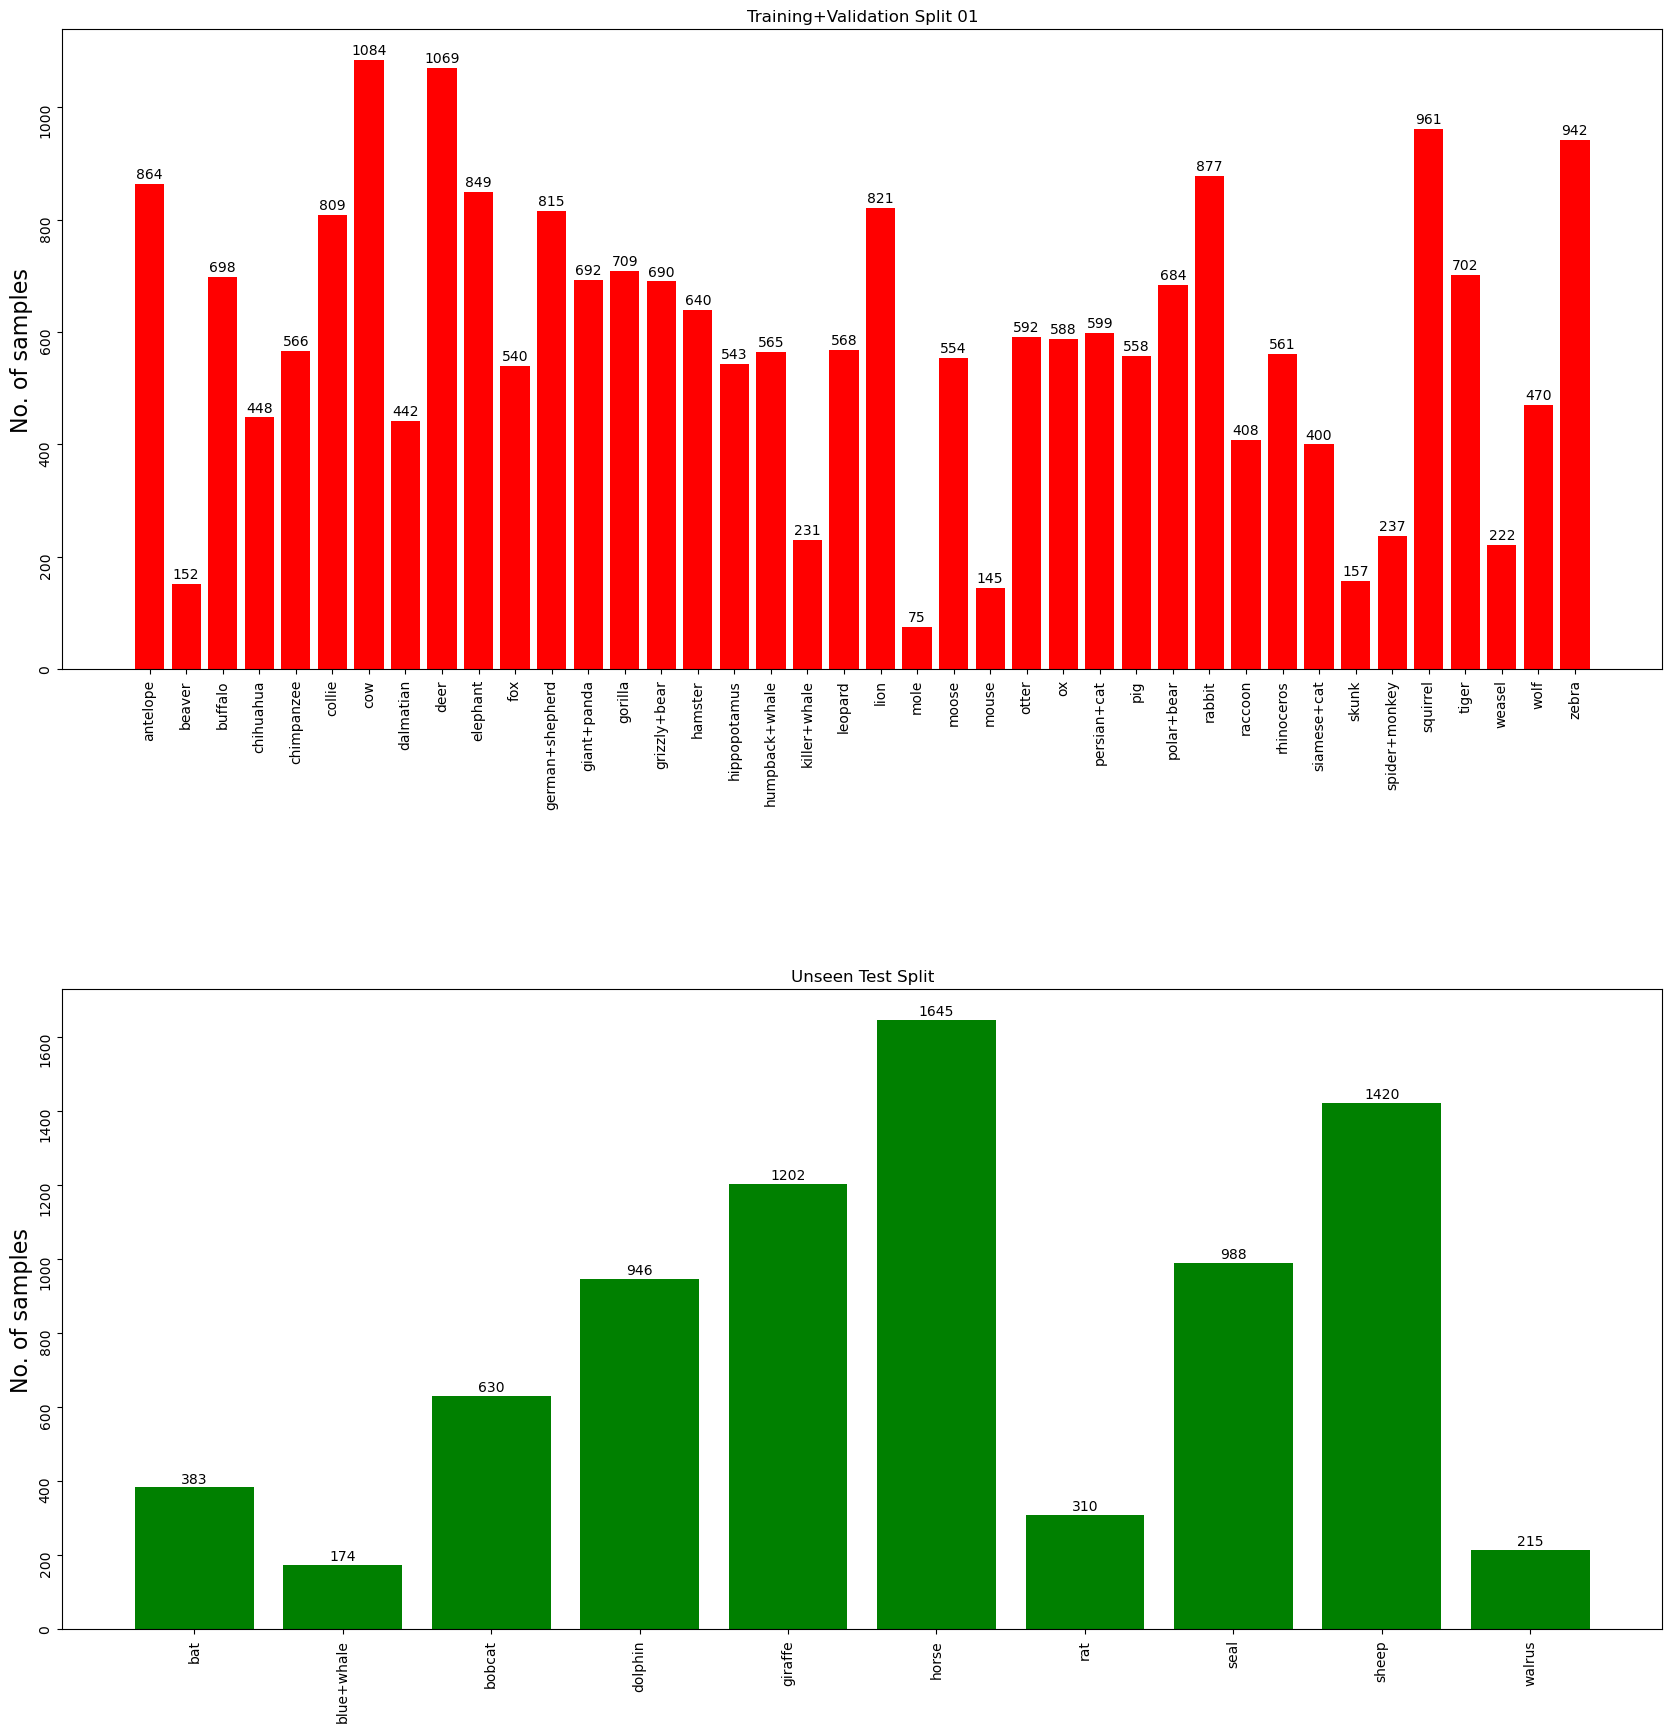

In [25]:
label_counts_trainval = collections.OrderedDict(sorted(Counter(trainval_df.classes).items()))
label_counts_train = collections.OrderedDict(sorted(Counter(train_df.classes).items()))
label_counts_val = collections.OrderedDict(sorted(Counter(val_df.classes).items()))
label_counts_seentest = collections.OrderedDict(sorted(Counter(seen_test_df.classes).items()))
label_counts_unseentest = collections.OrderedDict(sorted(Counter(unseen_test_df.classes).items()))

fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].title.set_text('Training+Validation Split 01')
axes[0].bar(label_counts_trainval.keys(), label_counts_trainval.values(), color = 'red')
axes[0].tick_params(labelrotation=90)
axes[0].set_ylabel('No. of samples', fontsize=16)
rects = axes[0].patches
labels = label_counts_trainval.values()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[0].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

#axes[1].title.set_text('Train Split')
#axes[1].bar(label_counts_train.keys(), label_counts_train.values(), color = 'red')
#axes[1].tick_params(labelrotation=90)

#axes[2].title.set_text('Validation Split')
#axes[2].bar(label_counts_val.keys(), label_counts_val.values(), color = 'blue')
#axes[2].tick_params(labelrotation=90)


#axes[3].title.set_text('Seen Test Split')
#axes[3].bar(label_counts_seentest.keys(), label_counts_seentest.values(), color = 'pink')
#axes[3].tick_params(labelrotation=90)


axes[1].title.set_text('Unseen Test Split')
axes[1].bar(label_counts_unseentest.keys(), label_counts_unseentest.values(), color = 'green')
axes[1].tick_params(labelrotation=90)
axes[1].set_ylabel('No. of samples', fontsize=16)
rects = axes[1].patches
labels = label_counts_unseentest.values()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    axes[1].text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )


import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})


#set the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=.5)

In [26]:
print(label_counts_trainval.keys())
label_counts_trainval.values()

odict_keys(['antelope', 'beaver', 'buffalo', 'chihuahua', 'chimpanzee', 'collie', 'cow', 'dalmatian', 'deer', 'elephant', 'fox', 'german+shepherd', 'giant+panda', 'gorilla', 'grizzly+bear', 'hamster', 'hippopotamus', 'humpback+whale', 'killer+whale', 'leopard', 'lion', 'mole', 'moose', 'mouse', 'otter', 'ox', 'persian+cat', 'pig', 'polar+bear', 'rabbit', 'raccoon', 'rhinoceros', 'siamese+cat', 'skunk', 'spider+monkey', 'squirrel', 'tiger', 'weasel', 'wolf', 'zebra'])


odict_values([864, 152, 698, 448, 566, 809, 1084, 442, 1069, 849, 540, 815, 692, 709, 690, 640, 543, 565, 231, 568, 821, 75, 554, 145, 592, 588, 599, 558, 684, 877, 408, 561, 400, 157, 237, 961, 702, 222, 470, 942])

In [27]:
print(label_counts_unseentest.keys())
label_counts_unseentest.values()
total_samples = list(label_counts_unseentest.values()) + list(label_counts_trainval.values())
print(np.mean(total_samples))
print(np.median(total_samples))

odict_keys(['bat', 'blue+whale', 'bobcat', 'dolphin', 'giraffe', 'horse', 'rat', 'seal', 'sheep', 'walrus'])
628.8
590.0


In [28]:
#Predefined Train - Validation Split 01
trainclasses1_classes_file = open("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/trainclasses1.txt", "r")
# reading the file
trainclasses1_classes_names = trainclasses1_classes_file.read()
# replacing end of line('/n') with ' ' and
trainclasses1_classes_names_list = trainclasses1_classes_names.replace('\n', ' ').split(" ")
# split in to train and val data
train01_df = trainval_df[trainval_df['classes'].isin(trainclasses1_classes_names_list)]
val01_df = trainval_df[~trainval_df['classes'].isin(trainclasses1_classes_names_list)]
# printing the data
print('\033[1m','\033[91m',"Training - Validation Split 01",'\033[0m')
print('\033[1m',"Train Classes",'\033[0m','\n', train01_df.classes.unique(),'\n')
print('\033[1m',"Validation Classes",'\033[0m','\n', val01_df.classes.unique(),'\n')


#Predefined Train - Validation Split 02
trainclasses2_classes_file = open("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/trainclasses2.txt", "r")
# reading the file
trainclasses2_classes_names = trainclasses2_classes_file.read()
# replacing end of line('/n') with ' ' and
trainclasses2_classes_names_list = trainclasses2_classes_names.replace('\n', ' ').split(" ")
# split in to train and val data
train02_df = trainval_df[trainval_df['classes'].isin(trainclasses2_classes_names_list)]
val02_df = trainval_df[~trainval_df['classes'].isin(trainclasses2_classes_names_list)]
# printing the data
print('\033[1m','\033[91m',"Training - Validation Split 02",'\033[0m')
print('\033[1m',"Train Classes",'\033[0m','\n', train02_df.classes.unique(),'\n')
print('\033[1m',"Validation Classes",'\033[0m','\n', val02_df.classes.unique(),'\n')


#Predefined Train - Validation Split 03
trainclasses3_classes_file = open("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/Updated Splits/trainclasses3.txt", "r")
# reading the file
trainclasses3_classes_names = trainclasses3_classes_file.read()
# replacing end of line('/n') with ' ' and
trainclasses3_classes_names_list = trainclasses3_classes_names.replace('\n', ' ').split(" ")
# split in to train and val data
train03_df = trainval_df[trainval_df['classes'].isin(trainclasses3_classes_names_list)]
val03_df = trainval_df[~trainval_df['classes'].isin(trainclasses3_classes_names_list)]
# printing the data
print('\033[1m','\033[91m',"Training - Validation Split 03",'\033[0m')
print('\033[1m',"Train Classes",'\033[0m','\n', train03_df.classes.unique(),'\n')
print('\033[1m',"Validation Classes",'\033[0m','\n', val03_df.classes.unique(),'\n')

  Training - Validation Split 01 
 Train Classes  
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 

 Validation Classes  
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 

  Training - Validation Split 02 
 Train Classes  
 ['buffalo' 'chimpanzee' 'collie' 'cow' 'deer' 'elephant' 'german+shepherd'
 'giant+panda' 'gorilla' 'hamster' 'hippopotamus' 'humpback+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'polar+bear' 'rabbit' 'raccoon'
 'rhinoceros' 'siamese+cat' 'spider+monkey' 'squirrel' 'tiger' 'weasel'
 'wolf'] 

 Validation Classes  
 ['antelope' 'beaver' 'chihuahua' 'dalmatian' 'fox' 'grizzly+bear'
 'killer+whale' 'otter' 'ox' 'persian+cat' 'pig' 'skun

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

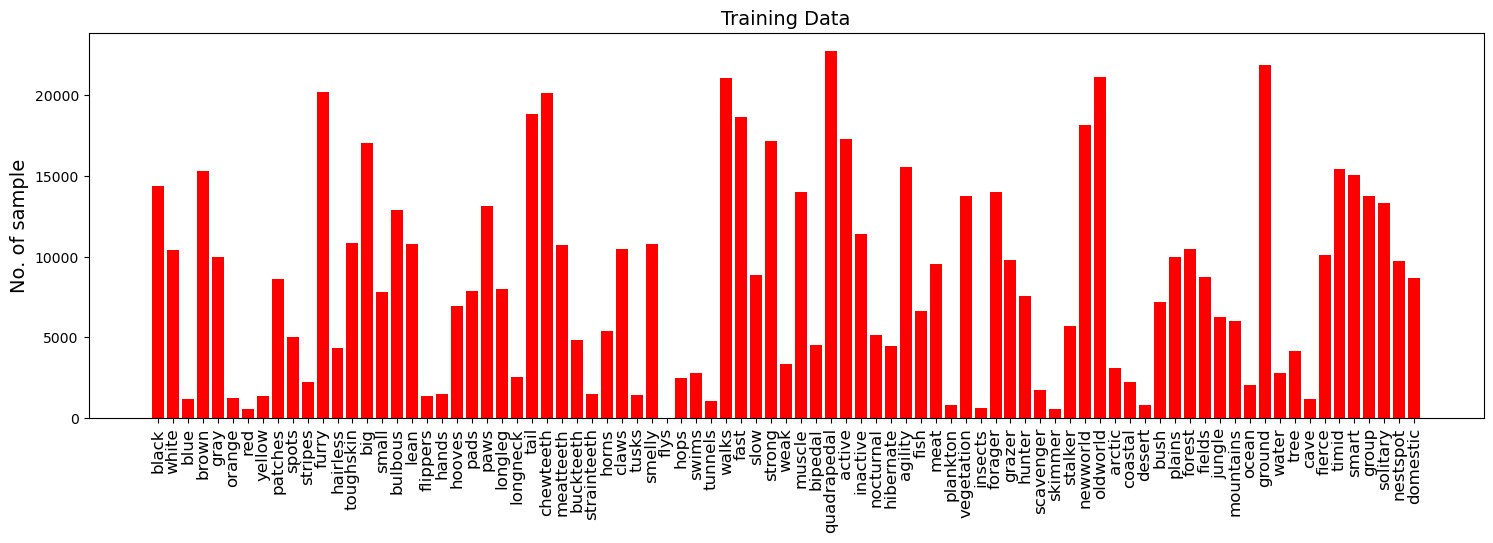

In [42]:
plt.figure(figsize=(18,5))
plt.bar(predicate_list,trainval_df.iloc[:,2051:2136].sum(), color = 'red')
plt.title('Training Data',fontsize = 14)
plt.ylabel("No. of sample", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 10)



(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

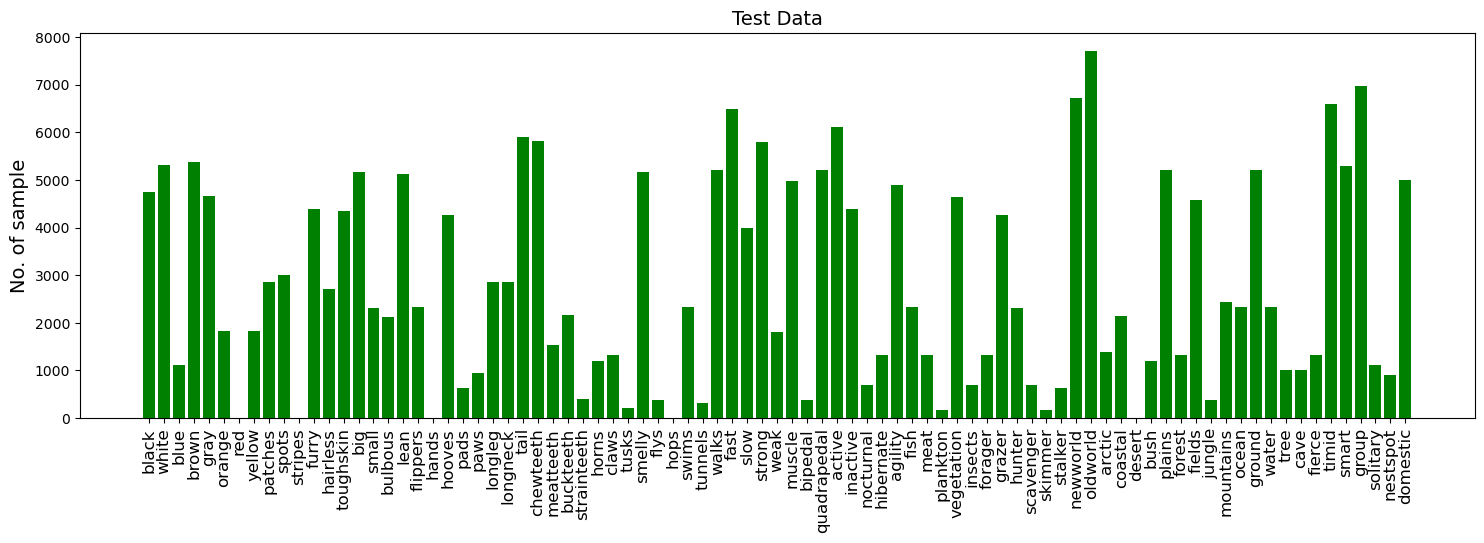

In [29]:
plt.figure(figsize=(18,5))
plt.bar(predicate_list,unseen_test_df.iloc[:,2051:2136].sum(), color = 'green')
plt.title('Test Data',fontsize = 14)
plt.ylabel("No. of sample", fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks(fontsize = 10)

### 2.4.3 Save as csv

In [78]:
#Test split
unseen_test_df.to_csv("C:/Dissertation/Data/Processed Data/UNSEEN_TestData.csv")
seen_test_df.to_csv("C:/Dissertation/Data/Processed Data/SEEN_TestData.csv")

#Train
train01_df.to_csv("C:/Dissertation/Data/Processed Data/TrainData01.csv")
train02_df.to_csv("C:/Dissertation/Data/Processed Data/TrainData02.csv")
train03_df.to_csv("C:/Dissertation/Data/Processed Data/TrainData03.csv")

#Validation
val01_df.to_csv("C:/Dissertation/Data/Processed Data/ValData01.csv")
val02_df.to_csv("C:/Dissertation/Data/Processed Data/ValData02.csv")
val03_df.to_csv("C:/Dissertation/Data/Processed Data/ValData03.csv")

#Train+Validation data
trainval_df.to_csv("C:/Dissertation/Data/Processed Data/TrainValData.csv")
train_df.to_csv("C:/Dissertation/Data/Processed Data/TrainData.csv")
val_df.to_csv("C:/Dissertation/Data/Processed Data/ValData.csv")

# 3. Visualising classes 2D space by decomposing the attributes using T_SNE

### 3.1 Based on predicates

In [123]:
#Seperate columns 
#animal_type = pd.DataFrame(['herd herbivore', 'bear', 'whale type', 'rodent', 'dog', 'domestic cat', 'horse', 'dog', 'whale type', 'domestic cat',  'rodent', 'rodent', 'wild cat', 'wild Africa', 'wild cat', 'herd herbivore', 'monkey', 'whale type', 'wild Africa', 'monkey', 'cow type', 'wild dog', 'herd herbivore', 'sea dog' , 'monkey', 'rodent', 'rodent', 'wild Africa', 'rodent', 'rodent', 'wild Africa', 'wild dog', 'dog', 'rodent', 'rodent', 'rodent', 'cow type', 'herd herbivore', 'bear', 'herd herbivore', 'wild cat', 'pig' , 'wild cat', 'rodent', 'bear', 'dog', 'sea dog' , 'rodent', 'cow type', 'whale type'], columns = ['animal type'])
labels = predicate_df['classes']
binary_attributes = predicate_df.iloc[:,2:87]
continous_attributes = StandardScaler().fit_transform(predicate_df.iloc[:,87:172])


In [34]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 31)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(binary_attributes)
 
    distortions.append(sum(np.min(cdist(binary_attributes, kmeanModel.cluster_centers_,
                                        'cosine'), axis=1)) /binary_attributes.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(binary_attributes, kmeanModel.cluster_centers_,
                                   'cosine'), axis=1)) / binary_attributes.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


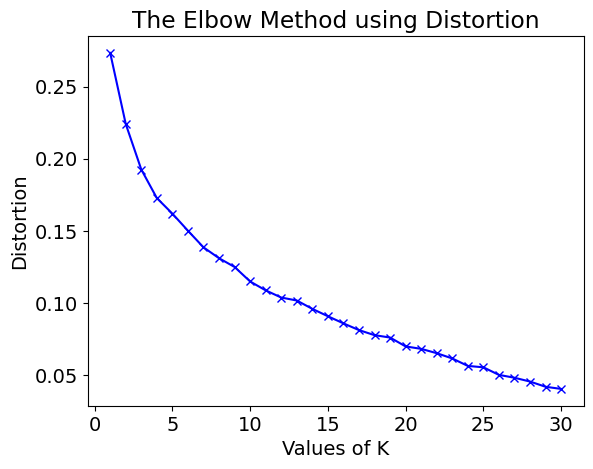

In [35]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

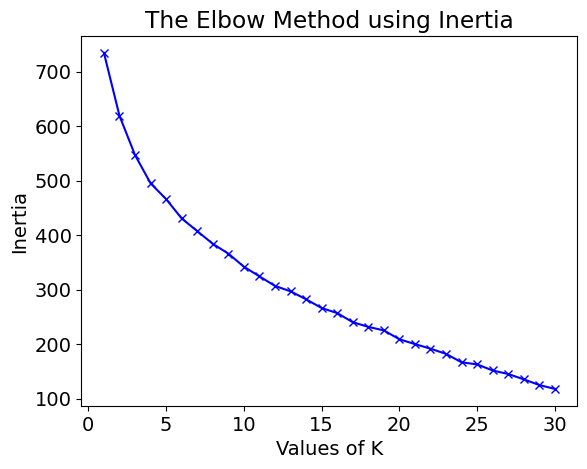

In [36]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


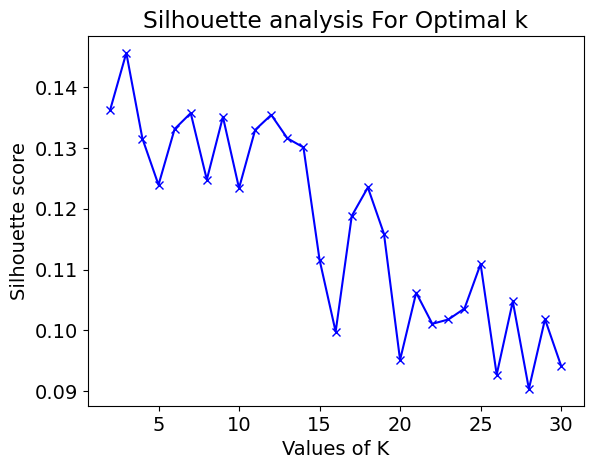

In [124]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30]
silhouette_avg = []
for num_clusters in range_n_clusters: 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(binary_attributes)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(binary_attributes, cluster_labels))
    
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [116]:
from nltk.cluster.kmeans import KMeansClusterer
import nltk
NUM_CLUSTERS = 21
data = continous_attributes

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance)
assigned_clusters = kclusterer.cluster(data, assign_clusters=True)
kmeans_df = pd.DataFrame(data = assigned_clusters
             , columns = ['K_mean'])

In [125]:
kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(binary_attributes)
clusters = kmeans.predict(binary_attributes)
kmeans_df = pd.DataFrame(data = clusters
             , columns = ['K_mean'])

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [126]:
#Binary
embeddings = TSNE(n_components=2, random_state = 100, metric = 'cosine', perplexity=15.0)
tsne_binary = embeddings.fit_transform(binary_attributes) 
tsne_binary_df = pd.DataFrame(data = tsne_binary
             , columns = ['Binary tsne-1', 'Binary tsne-2'])

#Continous
tsne_continous= embeddings.fit_transform(continous_attributes) 
tsne_continous_df = pd.DataFrame(data = tsne_continous
             , columns = ['Continous comp-1', 'Continous comp-2'])

#concat
tsne_binary_df1 = pd.concat([tsne_binary_df, labels], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['order']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['suborder']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['infraorder']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, taxonomy_df['family']], axis = 1)
tsne_binary_df1 = pd.concat([tsne_binary_df1, kmeans_df['K_mean']], axis = 1)

tsne_continous_df1 = pd.concat([tsne_continous_df, labels], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['order']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['suborder']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['infraorder']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, taxonomy_df['family']], axis = 1)
tsne_continous_df1 = pd.concat([tsne_continous_df1, kmeans_df['K_mean']], axis = 1)

C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Abhimanyu Acharya\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [127]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Binary tsne-1:Q',
    y='Binary tsne-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma')),
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

In [128]:
source = tsne_binary_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Binary tsne-1:Q',
    y='Binary tsne-2:Q',
    color=alt.Color('suborder:N', scale=alt.Scale(scheme='Magma')),
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='suborder:N'
)

points.interactive() + text1 

alt.LayerChart(...)

In [194]:
source = tsne_continous_df1

points = alt.Chart(source).mark_circle(size=200).encode(
    x='Continous comp-1:Q',
    y='Continous comp-2:Q',
    color=alt.Color('K_mean:N', scale=alt.Scale(scheme='Magma')),
    ).properties(
    width=800,
    height=800
)

text1 = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='classes:N'
)

text2 = points.mark_text(
    align='right',
    baseline='middle',
    dx=-10
).encode(
    text='K_mean:N'
)

points.interactive() + text1 + text2

alt.LayerChart(...)

### 3.2 Based on CNN features

In [93]:
#Seperate columns 
cnn_labels = unseen_test_df['classes']
cnn_labels.reset_index(drop=True, inplace=True)
cnn_features = unseen_test_df.iloc[:,1:2049]

In [94]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_cnn_features = tsne.fit_transform(cnn_features) 
tsne_cnn_features_df = pd.DataFrame(data = tsne_cnn_features
             , columns = ['comp-1', 'comp-2'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7913 samples in 0.016s...
[t-SNE] Computed neighbors for 7913 samples in 1.863s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7913
[t-SNE] Computed conditional probabilities for sample 2000 / 7913
[t-SNE] Computed conditional probabilities for sample 3000 / 7913
[t-SNE] Computed conditional probabilities for sample 4000 / 7913
[t-SNE] Computed conditional probabilities for sample 5000 / 7913
[t-SNE] Computed conditional probabilities for sample 6000 / 7913
[t-SNE] Computed conditional probabilities for sample 7000 / 7913
[t-SNE] Computed conditional probabilities for sample 7913 / 7913
[t-SNE] Mean sigma: 7.291966
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.371063
[t-SNE] KL divergence after 1000 iterations: 1.902238


In [95]:
tsne_cnn_features_df = pd.concat([tsne_cnn_features_df, cnn_labels], axis = 1)
tsne_cnn_features_df.head()

comp-1     comp-2 classes
0 -13.741584  -4.527387     bat
1 -11.189535 -11.167932     bat
2 -26.065611   9.613629     bat
3 -15.727520  -7.392513     bat
4 -25.605883   8.486200     bat

In [96]:
alt.data_transformers.disable_max_rows()
source = tsne_cnn_features_df

points = alt.Chart(source).mark_circle(size=50).encode(
    x='comp-1:Q',
    y='comp-2:Q',
    color=alt.Color('classes:N', scale=alt.Scale(scheme='Magma'))
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=2
).encode(
    text='classes:N'
)

points.interactive() 

alt.Chart(...)

In [97]:
#Seperate columns 
cnn_labels_full = ImageAttribute_df['classes']
cnn_labels_full.reset_index(drop=True, inplace=True)
cnn_features_full = ImageAttribute_df.iloc[:,1:2049]

In [98]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_cnn_features_full = tsne.fit_transform(cnn_features_full) 
tsne_cnn_features_full_df = pd.DataFrame(data = tsne_cnn_features_full
             , columns = ['comp-1', 'comp-2'])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 37322 samples in 0.063s...
[t-SNE] Computed neighbors for 37322 samples in 39.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37322
[t-SNE] Computed conditional probabilities for sample 2000 / 37322
[t-SNE] Computed conditional probabilities for sample 3000 / 37322
[t-SNE] Computed conditional probabilities for sample 4000 / 37322
[t-SNE] Computed conditional probabilities for sample 5000 / 37322
[t-SNE] Computed conditional probabilities for sample 6000 / 37322
[t-SNE] Computed conditional probabilities for sample 7000 / 37322
[t-SNE] Computed conditional probabilities for sample 8000 / 37322
[t-SNE] Computed conditional probabilities for sample 9000 / 37322
[t-SNE] Computed conditional probabilities for sample 10000 / 37322
[t-SNE] Computed conditional probabilities for sample 11000 / 37322
[t-SNE] Computed conditional probabilities for sample 12000 / 37322
[t-SNE] Computed conditional probabilities for sa

In [99]:
tsne_cnn_features_full_df = pd.concat([tsne_cnn_features_full_df, cnn_labels_full], axis = 1)
tsne_cnn_features_full_df.head()

comp-1    comp-2   classes
0  20.280325 -2.780523  antelope
1  21.449663  5.084022  antelope
2  25.138685 -3.379063  antelope
3  24.733410 -0.500173  antelope
4  23.892458 -0.818489  antelope

In [100]:
alt.data_transformers.disable_max_rows()
source = tsne_cnn_features_full_df

points = alt.Chart(source).mark_circle(size=50).encode(
    x='comp-1:Q',
    y='comp-2:Q',
    color='classes:N',
    ).properties(
    width=800,
    height=800
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=2
).encode(
    text='classes:N'
)

points.interactive()

alt.Chart(...)